# Modulated periodical time series

In [1]:
import numpy as np
from scipy.signal import hilbert
import xarray as xr
import statsmodels.api as sm

%matplotlib inline
import matplotlib.pyplot as plt

import sstats.tseries as ts

In [2]:
from dask.distributed import Client, LocalCluster
#
cluster = LocalCluster()
#
#from dask_jobqueue import PBSCluster
#cluster = PBSCluster()
#w = cluster.scale(28*1)
#
client = Client(cluster)
client

Client Scheduler: tcp://127.0.0.1:65007 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 4 Memory: 17.18 GB


---

## generate synthetic data

In [3]:
x = ts.normal((100, 1./24), 0., draws=100).rename('x')
y = ts.normal((100, 1./24), 0., draws=100).rename('x')

omega = 2*np.pi*2

z = np.real((0.+x)*np.cos(omega*x.time)+1j*y*np.sin(omega*x.time)).persist()

zh = xr.apply_ufunc(hilbert, z, dask='parallelized', output_dtypes=[complex])

R = np.abs(zh)
theta = np.angle(zh)

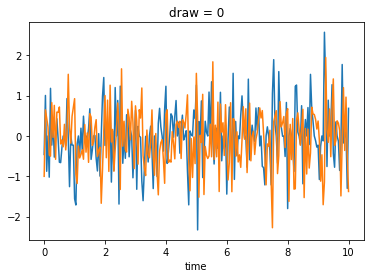

In [4]:
np.real(zh.sel(draw=0, time=slice(0,10))).plot()
np.imag(zh.sel(draw=0, time=slice(0,10))).plot()

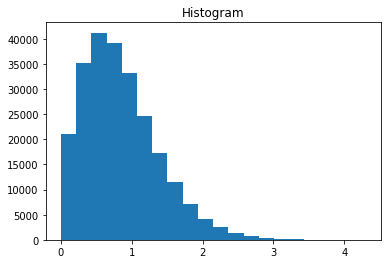

In [6]:
h, bins, _ = R.plot.hist(bins=20)

In [7]:
bins

array([1.82769998e-05, 2.14829667e-01, 4.29641057e-01, 6.44452447e-01,
       8.59263837e-01, 1.07407523e+00, 1.28888662e+00, 1.50369801e+00,
       1.71850940e+00, 1.93332079e+00, 2.14813218e+00, 2.36294357e+00,
       2.57775496e+00, 2.79256635e+00, 3.00737774e+00, 3.22218913e+00,
       3.43700052e+00, 3.65181191e+00, 3.86662330e+00, 4.08143469e+00,
       4.29624608e+00])